In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
sns.__version__

'0.11.2'

In [3]:
alucar = pd.read_csv('alucar.csv')
alucar.head(3)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33


In [4]:
print('Quantidade de linha e colunas: ', alucar.shape)  

Quantidade de linha e colunas:  (24, 2)


In [5]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum() )

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
def plotar (titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(x=x, y= y, data=dataset)
  sns.set_palette('Accent')
  sns.set_style ('darkgrid')
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax


In [9]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()


,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


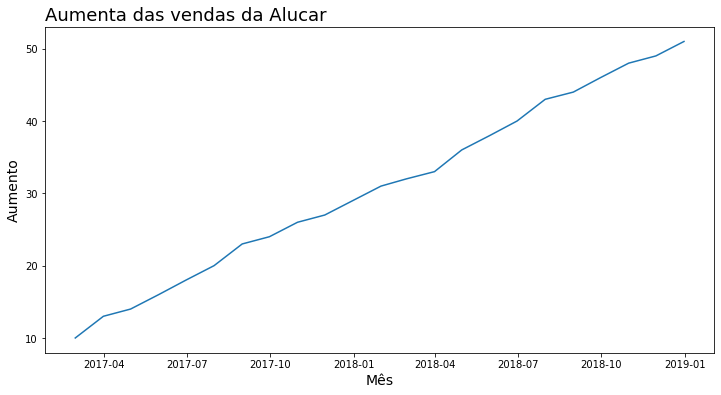

In [10]:
plotar('Aumenta das vendas da Alucar', 'Mês', 'Aumento', 'mes', 'aumento', alucar)

In [11]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


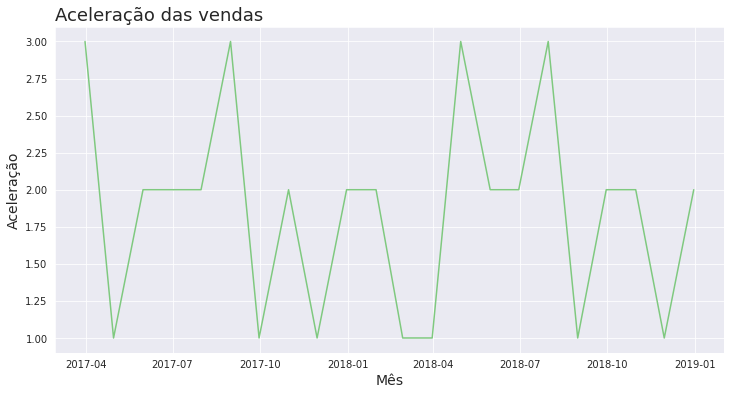

In [12]:
plotar('Aceleração das vendas', 'Mês', 'Aceleração', 'mes', 'aceleracao', alucar)

## Juntando os gráficos em um único espaço 

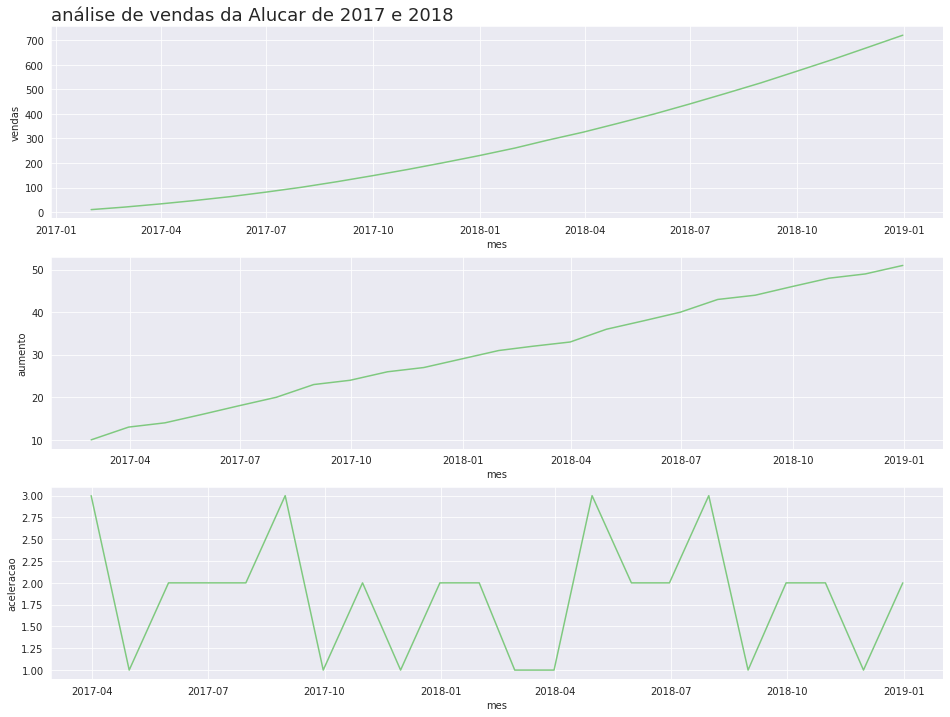

In [13]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [14]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax=ax

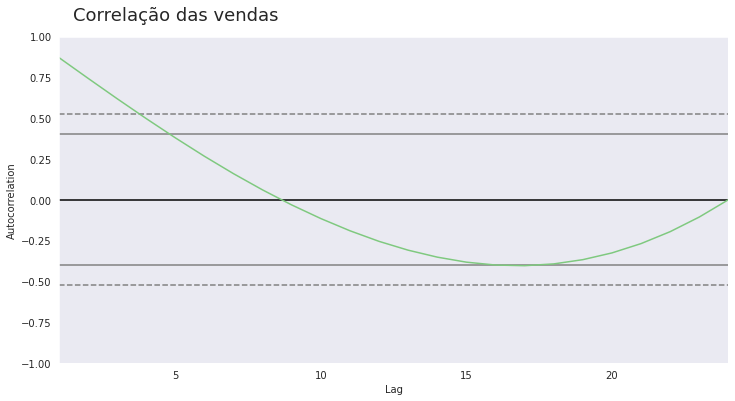

In [15]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

### No primeiros dias existe uma correlação com os dias anteriores e com o passar do tempo esse correlação se torna nula.

# **Alucar - Analisando assinates da newsletter** 

In [16]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [17]:
assinantes.dtypes
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [18]:
print('Quantidade de assinaturas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())


Quantidade de assinaturas:  (24, 2)
Quantidade de dados nulos:  0


In [19]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


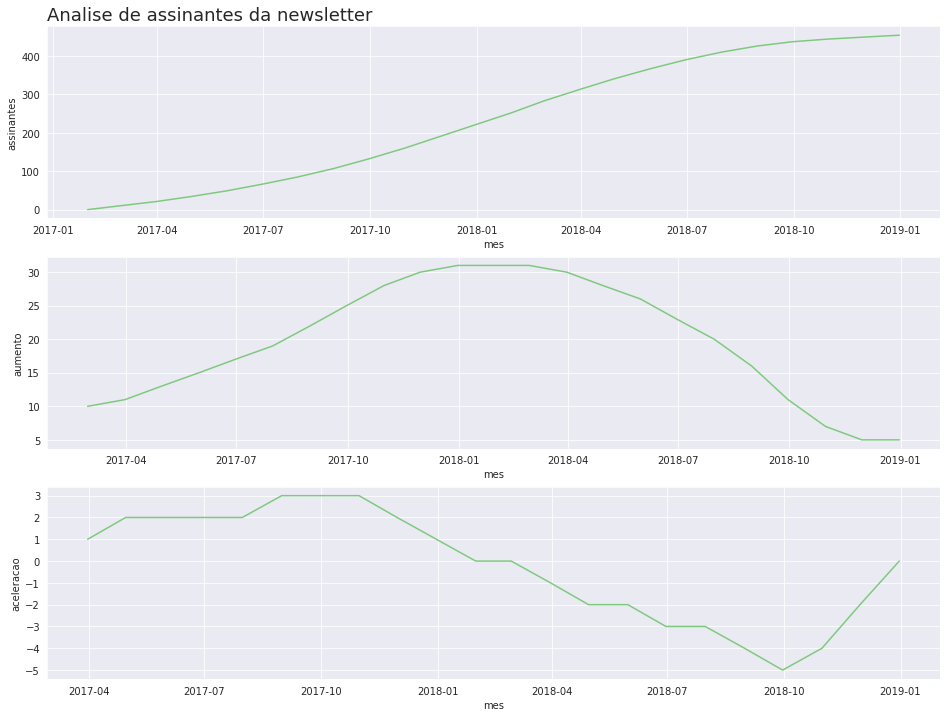

In [20]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Analise de assinantes da newsletter')

### No primeiro gráfico no primeiro momento, vemos que existe um numero crescente de assinaturas. Quando analisamos o aumento, esse crescimento ocorre até o mês quatro.

# Chocolura


In [21]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [22]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [23]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [24]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()


In [25]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


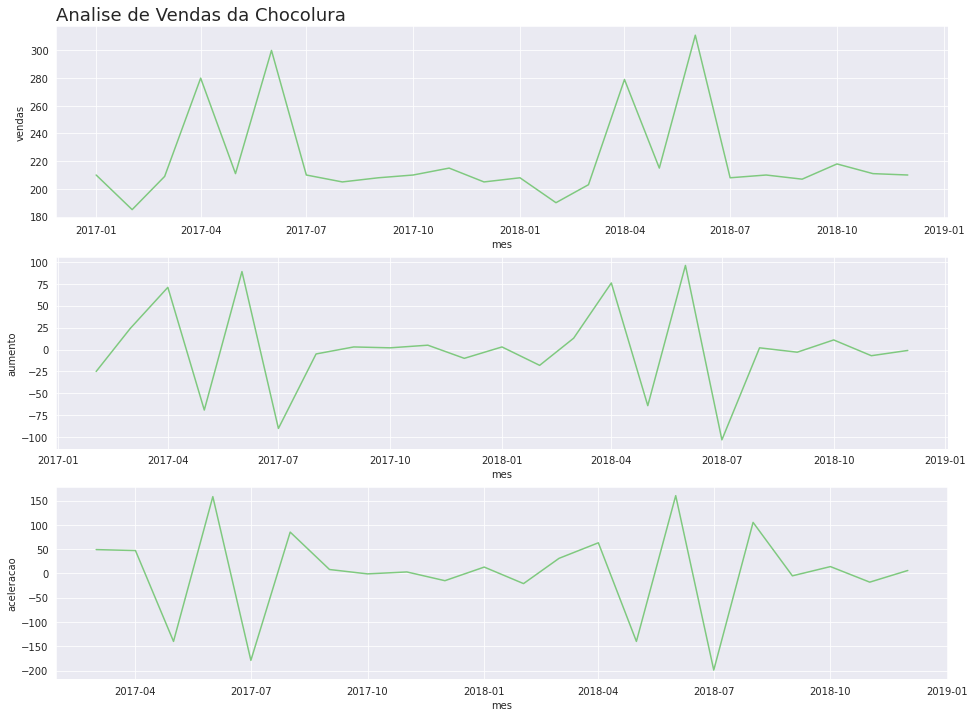

In [26]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, "Analise de Vendas da Chocolura")

### Podemos ver que nos meses de abril e junho temos um aumento na compra de chocolates, isso demostra que temos uma sazonalidade nesses período.


# Chocolura - Vendas diárias (Outubro e Novembro)

In [27]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [28]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [29]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [30]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidades de linhas nulas: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidades de linhas nulas:  0


In [31]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


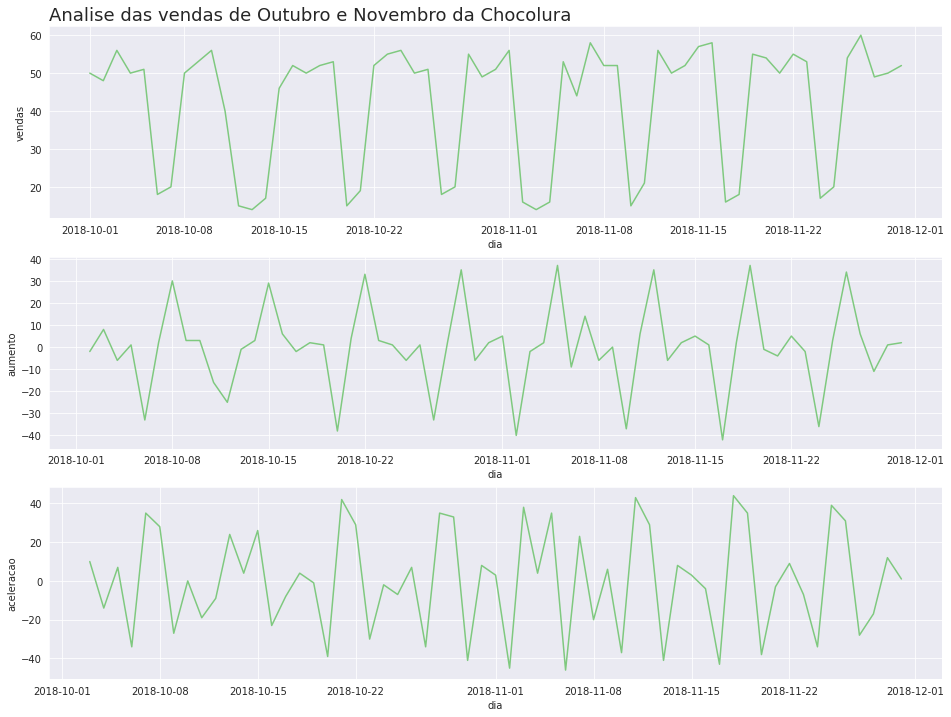

In [32]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Analise das vendas de Outubro e Novembro da Chocolura')

### Analisando a sazonalidade

In [33]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [34]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [35]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}
dias_traduzidos



{'Monday': 'Segunda',
 'Tuesday': 'Terça',
 'Wednesday': 'Quarta',
 'Thursday': 'Quinta',
 'Friday': 'Sexta',
 'Saturday': 'Sabado',
 'Sunday': 'Domingo'}

In [36]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


### Agrupar por dias

In [37]:
vendas_grupo = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao', 'dia_da_semana'].mean().round()
vendas_grupo

<ipython-input-37-7b986121323b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_grupo = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao', 'dia_da_semana'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


### correlação das vendas diárias

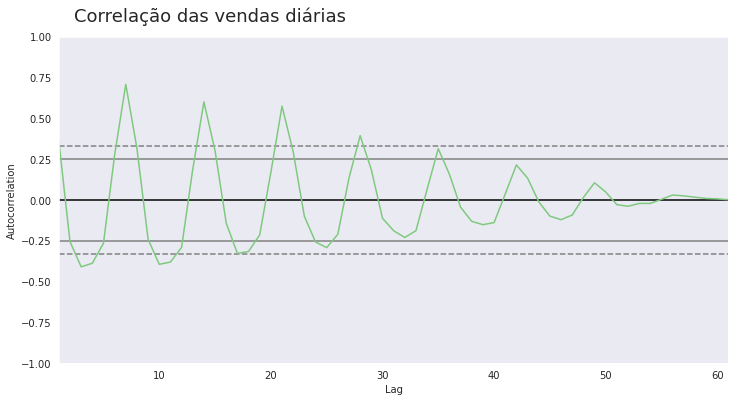

In [40]:
  ax = plt.figure(figsize=(12,6))
  ax.suptitle ('Correlação das vendas diárias', fontsize = 18, x=0.3, y=0.95)
  autocorrelation_plot(vendas_por_dia['vendas'])
  ax = ax



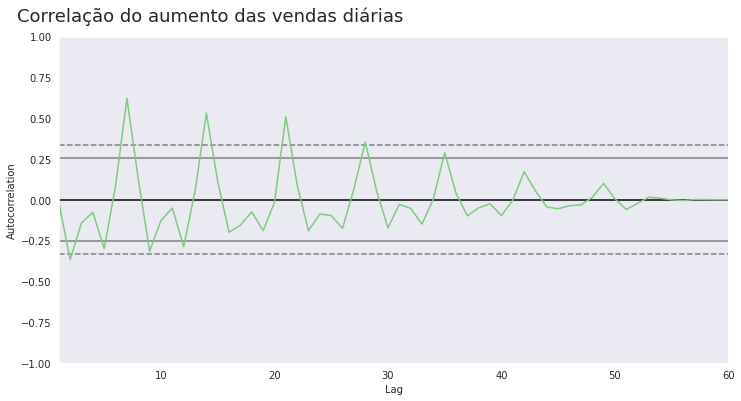

In [42]:
  ax = plt.figure(figsize=(12,6))
  ax.suptitle ('Correlação da aceleração das vendas diárias', fontsize = 18, x=0.3, y=0.95)
  autocorrelation_plot(vendas_por_dia['aumento'][1:])
  ax = ax

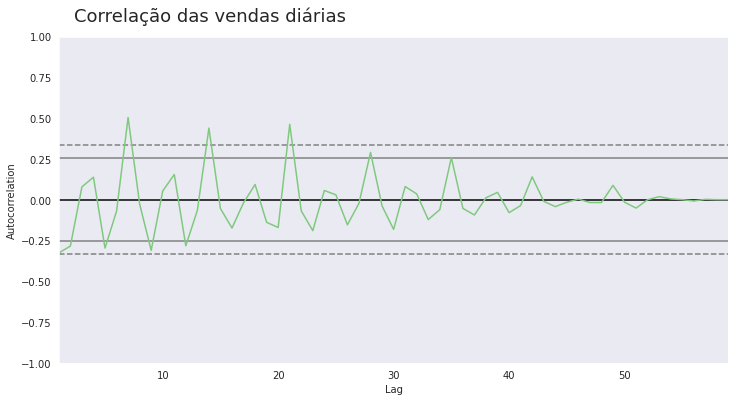

In [43]:
  ax = plt.figure(figsize=(12,6))
  ax.suptitle ('Correlação das vendas diárias', fontsize = 18, x=0.3, y=0.95)
  autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
  ax = ax

# Cafelura - Analise de Vendas
  



In [46]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [49]:
print('Temos o total de linhas e colunas: ', cafelura.shape )
print('A Quantidade de linhas nulas é de :', cafelura.isna().sum().sum())

Temos o total de linhas e colunas:  (24, 2)
A Quantidade de linhas nulas é de : 0


In [51]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [53]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [56]:
cafelura['aumento'] = cafelura['vendas'].diff()
cafelura['aceleracao'] = cafelura['aumento'].diff()
cafelura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


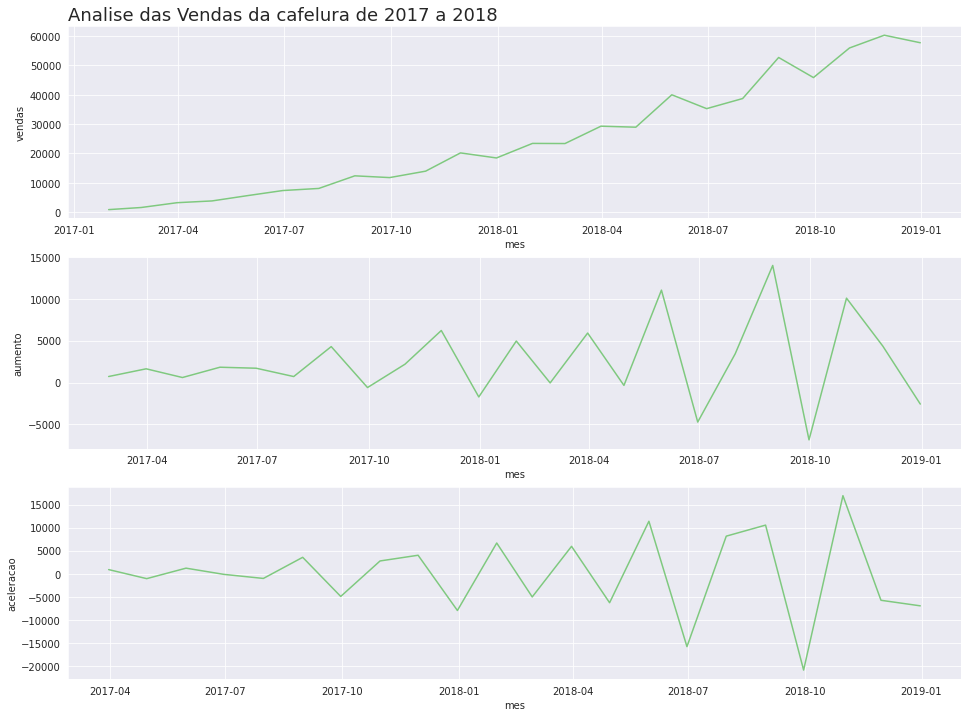

In [58]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', cafelura, "Analise das Vendas da cafelura de 2017 a 2018")

In [60]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [61]:
quantidade_de_dias_de_fds.dtypes


quantidade_de_dias    int64
dtype: object

In [65]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


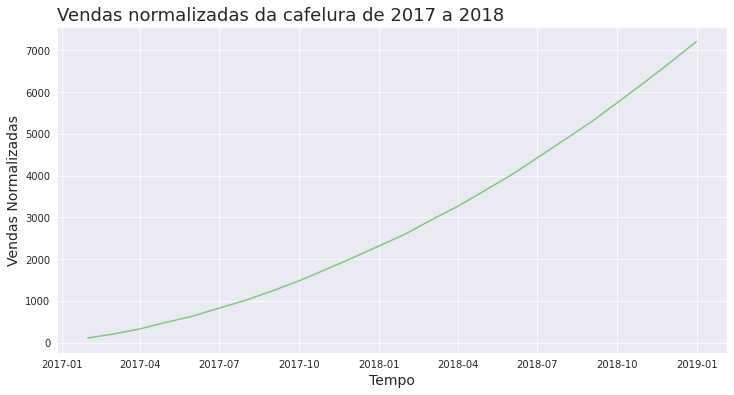

In [66]:
plotar('Vendas normalizadas da cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

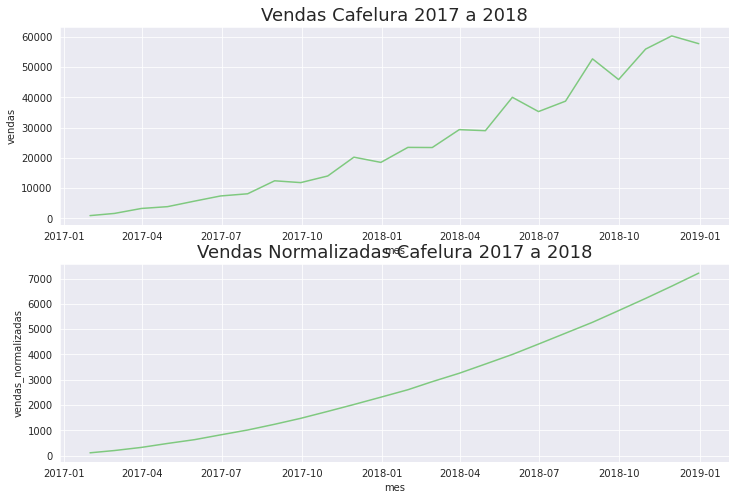

In [71]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 a 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas', data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 a 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas_normalizadas', data = cafelura)
ax=ax

# Statsmodel

<ipython-input-78-a4ce4bbc4f41>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resultado = seasonal_decompose(chocolura['vendas'], freq=2)


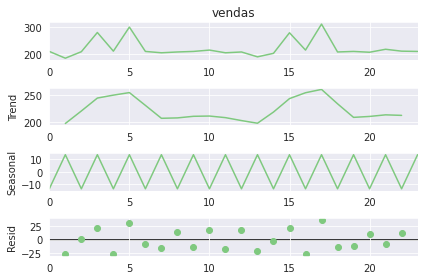

In [78]:
resultado = seasonal_decompose(chocolura['vendas'], freq=2)
ax = resultado.plot() 

# Alucel - Análise de Vendas

In [86]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [87]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [88]:
alucel['dia'] = pd.to_datetime(aluce['dia'])
alucel['aumento'] = aluce['vendas'].diff()
alucel['aceleracao'] = aluce['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


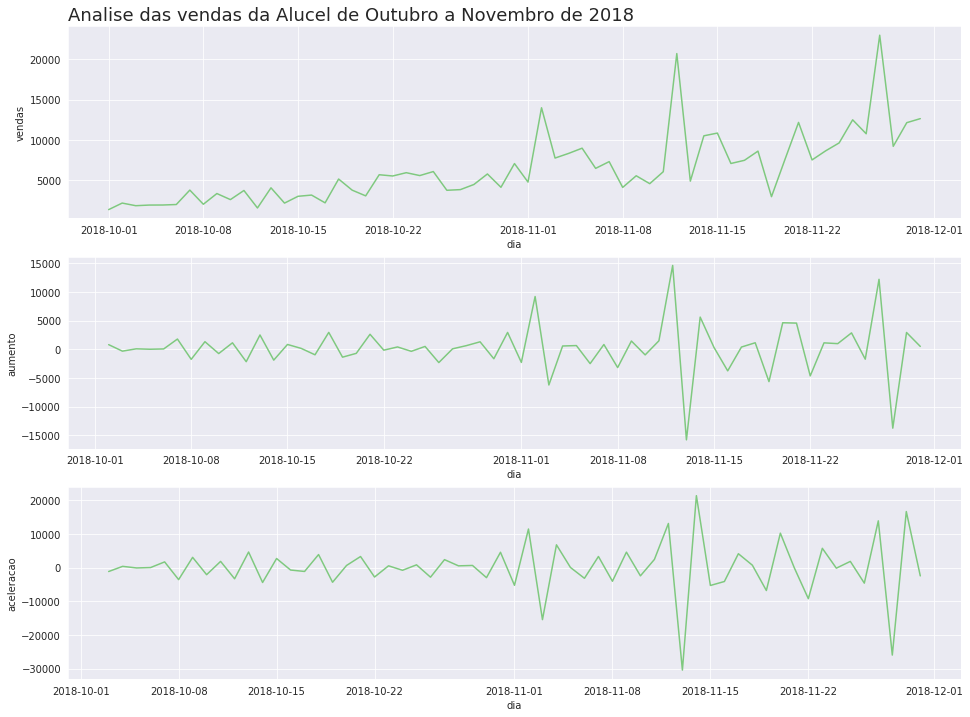

In [91]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Analise das vendas da Alucel de Outubro a Novembro de 2018')

### Média móvel

In [94]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel['media_movel21'] = alucel['vendas'].rolling(21).mean()
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel,media_movel21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


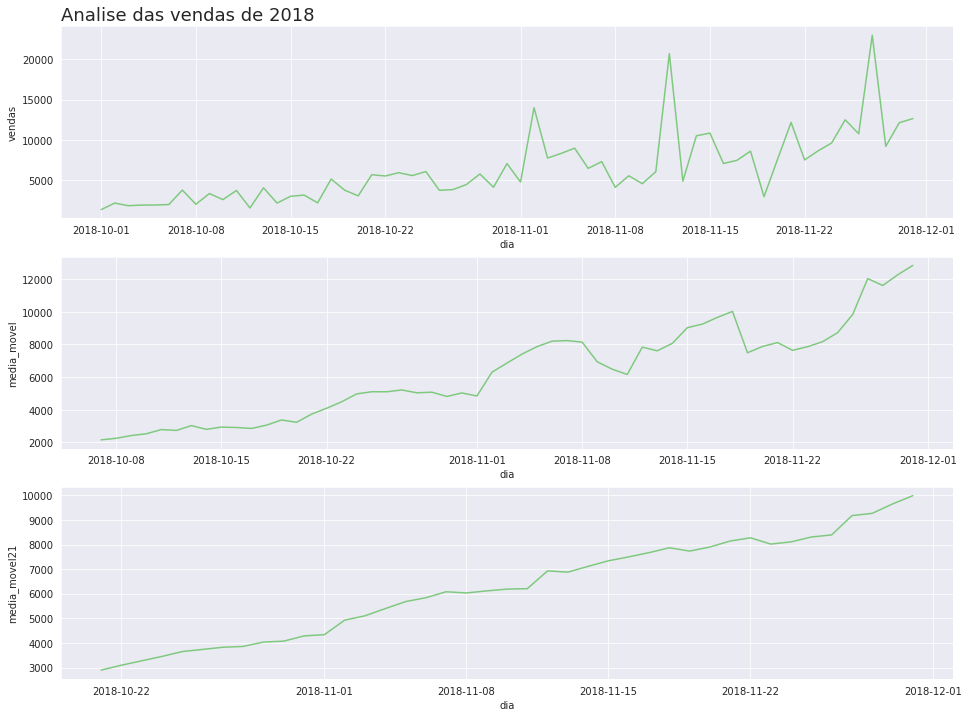

In [96]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel21', alucel, 'Analise das vendas de 2018')